# U.S. Medical Insurance Costs
**edit histograms to better illustrate cost difference (standardize/align x and y coordinates across different categaries (ages)**

## Scoping Your Project
What is it that you want to find out about this dataset?
<br><br>**Some possible ideas for analysis are the following:**
* Is there a correlation between insurance cost and region, age, sex, number of children, bmi?
* Find out the average age of the patients in the dataset.
* Analyze where a majority of the individuals are from.
* [Look at the different costs between smokers vs. non-smokers](#Comparing-Smoker-Data).
    * Analyze the `charge` [outliers of non-smokers](#Analyze-the-outliers-from-the-non-smoking-population)
* [Figure out what the average age is for someone who has at least one child in this dataset](#Comparing-Number-of-Children).


**Main components that you will want to include:**
* Goals: analyze data based on:
    * [age categories](#Analyzing-age-categories): (1) young adult (18 years), (2) adult (19-33 years), (3) young middle-aged (34-48 years), and (4) middle-aged (49-64 years).
    * [bmi ranges](#Comparing-BMI-Ranges): (1) underweight (<18.5), (2) healthy (18.5-24.9), (3) overweight (25.0-29.9), (4) obese (30-39), and (5) extremely obese (>=40).
    * number of children
* Data
* Analysis:
    * Smokers:
        1. Correlated with insurance charges: on average, smokers are charged >20k dollars more than non-smokers.
    * Age:
        1. Correlated with insurance charges.
    * BMI:
        1. Over half of the extremely obese population (55.7%) reside in the southeast region.
        2. No correlation with insurance charges.

These are just some ideas and we hope they give you a good starting point. As you think of ideas, also consider what the implications of some of the results would be. For example, we may find that this dataset is mainly composed of individuals who have children or that it is imbalanced in terms of representation of males vs. females. Taking information like this into consideration when looking at data can give you sinight into potential use cases as well as where certain biases can impact results.

In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from decimal import Decimal
%matplotlib inline

### creating a pandas Data Frame of the CSV file

In [2]:
ins = read_csv('insurance.csv')

### storing columns of `ins` in variables to visualize data
Key findings:
* age:
    * what percentage of the data make up young adults?
        * What regions do they inhabit?
        * what does the data look like when we remove 18 and 19 year olds?

In [3]:
ages = list(ins.loc[:, 'age'])
sexes = list(ins.loc[:, 'sex'])
bmis = list(ins.loc[:, 'bmi'])
children = list(ins.loc[:, 'children'])
smoker = list(ins.loc[:, 'smoker'])
region = list(ins.loc[:, 'region'])
charges = list(ins.loc[:, 'charges'])

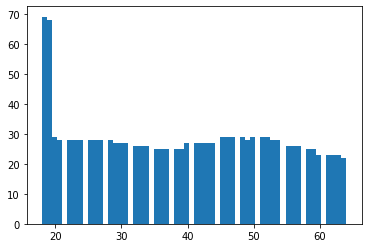

In [4]:
plt.hist(ages, bins=60);

In [5]:
def find_average_age(DataFrame):
    total_age = 0
    ages = ins.loc[:, 'age']
    for age in ages:
        total_age+=age
    return int(total_age / len(ages))

In [6]:
find_average_age(ins)

39

In [7]:
def find_regional_frequency(DataFrame):
    region = list(DataFrame.loc[:, 'region'])
    regions = {}
    
    for i in region:
        if i not in regions:
            regions[i] = 1
        else:
            regions[i] += 1
            
    plt.bar(regions.keys(), regions.values())
    return None

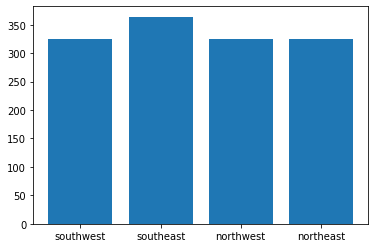

In [8]:
find_regional_frequency(ins)

## Comparing Smoker Data

In [9]:
def compare_smoker(DataFrame):
    # index data
    charges = list(DataFrame.loc[:, 'charges'])
    smokers = list(DataFrame.loc[:, 'smoker'])
    # separate data
    smoker_list, smoker_dict = list(), dict()
    non_smoker_list, non_smoker_dict = list(), dict()
    
    # loop through 'smokers' column to separate population
    for i in range(len(smokers)):
        if smokers[i] == 'yes':
            smoker_list.append(i)
        else:
            non_smoker_list.append(i)
    
    # create DataFrames for separated data
    def DataFrameCreation(lists, dicts):
        
        for i in dicts:
            i['age'] = list()
            i['sex'] = list()
            i['bmi'] = list()
            i['children'] = list()
            i['smoker'] = list()
            i['region'] = list()
            i['charges'] = list()
        
        for i, j in enumerate(lists):
            for k in j:
                dicts[i]['age'].append(DataFrame.loc[k, 'age'])
                dicts[i]['sex'].append(DataFrame.loc[k, 'sex'])
                dicts[i]['bmi'].append(DataFrame.loc[k, 'bmi'])
                dicts[i]['children'].append(DataFrame.loc[k, 'children'])
                dicts[i]['smoker'].append(DataFrame.loc[k, 'smoker']) 
                dicts[i]['region'].append(DataFrame.loc[k, 'region']) 
                dicts[i]['charges'].append(DataFrame.loc[k, 'charges'])
    # lists, dicts, and function call to create DataFrames
    my_lists = [smoker_list, non_smoker_list]
    my_dicts = [smoker_dict, non_smoker_dict]          
    DataFrameCreation(my_lists, my_dicts)

    a = plt.boxplot((non_smoker_dict['charges'], smoker_dict['charges']), showmeans=True, labels=('Non-Smoker', 'Smoker'))
    non_smoker_mean = a['means'][0].get_data()[1][0]
    smoker_mean = a['means'][1].get_data()[1][0]
    print('Total Data points: {}'.format(len(smoker_list) + len(non_smoker_list)))
    print('Non-Smoker Data:')
    print('\tsample size: {}'.format(len(non_smoker_list)))
    print('\tmedian: {}'.format(a['medians'][0].get_data()[1][0]))
    print('\tmean: {}'.format(non_smoker_mean))
    print('\tfliers: {}'.format(len(a['fliers'][0].get_data()[0])))
    print('Smoker Data:')
    print('\tsample size: {}'.format(len(smoker_list)))
    print('\tmedian: {}'.format(a['medians'][1].get_data()[1][0]))
    print('\tmean: {}'.format(smoker_mean))
    print('On average, smokers pay {} dollars more than non-smokers.'.format(smoker_mean - non_smoker_mean))
    return smoker_dict, non_smoker_dict

Total Data points: 1338
Non-Smoker Data:
	sample size: 1064
	median: 7345.4053
	mean: 8434.268297856204
	fliers: 46
Smoker Data:
	sample size: 274
	median: 34456.348450000005
	mean: 32050.23183153284
On average, smokers pay 23615.963533676637 dollars more than non-smokers.


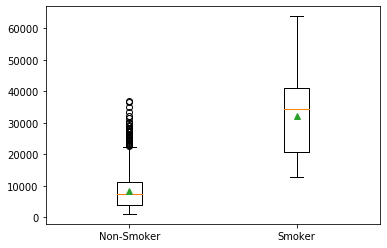

In [10]:
smoker, non_smoker = compare_smoker(ins);

## Analyze the outliers from the non-smoking population

In [11]:
def non_smoker_fliers(DataFrame):
    
    # indexing
    charges = list(DataFrame.loc[:, 'charges'])
    smokers = list(DataFrame.loc[:, 'smoker'])
    
    # find index of fliers from DataFrame
    outliers = list()
    
    # dict to convert to DataFrame
    outliers_dict = {
        'age': list(),
        'sex': list(),
        'bmi': list(),
        'children': list(),
        'smoker': list(),
        'region': list(),
        'charges': list(),
    }
    
    # loop through 'smokers' column to separate population
    for i in range(len(smokers)):
        if smokers[i] == 'no':
            if charges[i] > 22395.74424:
                outliers.append(i)
    
    # updating fliers DataFrame
    for i in outliers:
        outliers_dict['age'].append(DataFrame.loc[i, 'age'])
        outliers_dict['sex'].append(DataFrame.loc[i, 'sex'])
        outliers_dict['bmi'].append(DataFrame.loc[i, 'bmi'])
        outliers_dict['children'].append(DataFrame.loc[i, 'children'])
        outliers_dict['smoker'].append(DataFrame.loc[i, 'smoker']) 
        outliers_dict['region'].append(DataFrame.loc[i, 'region']) 
        outliers_dict['charges'].append(DataFrame.loc[i, 'charges']) 

    return outliers_dict

In [12]:
c = non_smoker_fliers(ins) # variable to analyse fliers from non-smoker boxplot

In [13]:
def find_average_ages(DataFrame):
    children = list(DataFrame.loc[:, 'children'])
    no_children_ages = list()
    has_children_ages = list()
    for i in range(len(children)):
        if children[i] >= 1:
            has_children_ages.append(DataFrame.loc[i, 'age'])
        else:
            no_children_ages.append(DataFrame.loc[i, 'age'])
    no_children_average = int(sum(no_children_ages) / len(no_children_ages))
    has_children_average = int(sum(has_children_ages) / len(has_children_ages))
    print('Average age of insured with at least one child: {}'.format(has_children_average))
    print('Average age of insured without children: {}'.format(no_children_average))
    return None

In [14]:
find_average_ages(ins)

Average age of insured with at least one child: 39
Average age of insured without children: 38


## Analyzing age categories

In [15]:
# This function shows a strong correlation between age and insurance cost
""" 
    age categories:
        1. Young Adults: 18 years
        2. Adults: 19-33 years
        3. Young, Middle-aged: 34-48 years
        4. Old, Middle-aged: 49-64 years
        5. Senior: 65-78 years
        6. Elder: 79-98 years
"""
def compare_age_groups_of_non_smokers(DataFrame):
    
    # indexing data
    smokers = list(DataFrame.loc[:, 'smoker'])
    ages = list(DataFrame.loc[:, 'age'])
    charges = list(DataFrame.loc[:, 'charges'])
    
    # Young Adults: age < 19
    ya, ya_outliers, ya_dict, ya_fliers = list(), list(), dict(), dict()
    # Adults: 19 <= age < 34
    a, a_outliers, a_dict, a_fliers = list(), list(), dict(), dict()   
    # Young, Middle-aged: 34 <= age < 49
    yma, yma_outliers, yma_dict, yma_fliers = list(), list(), dict(), dict() 
    # Middle-aged: 49 <= age < 65
    ma, ma_outliers, ma_dict, ma_fliers = list(), list(), dict(), dict() 
    # Seniors: age >= 65
    s, s_outliers, s_dict, s_fliers = list(), list(), dict(), dict() 
    
    # separate ages and find outliers: iterate through smoker, age, and charges
    for i in range(len(ages)):
        if smokers[i] == 'no':
            if ages[i] < 19: # age < 19
                ya.append(i)
                #if charges[i] > 3597.5959999999995:
                #    ya_outliers.append(i)
                #else:
                #    ya.append(i)
            elif ages[i] < 34: # 19 <= age < 34
                a.append(i)
                #if charges[i] > 7986.47525:
                #    a_outliers.append(i)
                #else:
                #    a.append(i)
            elif ages[i] < 49: # 34 <= age < 49
                yma.append(i)
                #if charges[i] > 15828.821730000001:
                #    yma_outliers.append(i)
                #else:
                #    yma.append(i)
            elif ages[i] < 65: # 49 <= age < 65
                ma.append(i)
                #if charges[i] > 15828.821730000001:
                #    ma_outliers.append(i)
                #else:
                #    ma.append(i)
            elif ages[i] >= 65: # age >= 65
                s.append(i)
                #if charges[i] > 16069.08475:
                #    s_outliers.append(i)
                #else:
                #    s.append(i)
                    
    # create DataFrames for separated data
    def DataFrameCreation(lists, dicts):
        
        for i in dicts:
            i['age'] = list()
            i['sex'] = list()
            i['bmi'] = list()
            i['children'] = list()
            i['smoker'] = list()
            i['region'] = list()
            i['charges'] = list()
        
        for i, j in enumerate(lists):
            for k in j:
                dicts[i]['age'].append(DataFrame.loc[k, 'age'])
                dicts[i]['sex'].append(DataFrame.loc[k, 'sex'])
                dicts[i]['bmi'].append(DataFrame.loc[k, 'bmi'])
                dicts[i]['children'].append(DataFrame.loc[k, 'children'])
                dicts[i]['smoker'].append(DataFrame.loc[k, 'smoker']) 
                dicts[i]['region'].append(DataFrame.loc[k, 'region']) 
                dicts[i]['charges'].append(DataFrame.loc[k, 'charges'])
    # lists, dicts, and function call to create DataFrames
    my_lists = [ya, ya_outliers, a, a_outliers, yma, yma_outliers, ma, ma_outliers, s, s_outliers]
    my_dicts = [ya_dict, ya_fliers, a_dict, a_fliers, yma_dict, yma_fliers, ma_dict, ma_fliers, s_dict, s_fliers]          
    DataFrameCreation(my_lists, my_dicts)
    # combine all fliers into one dictionary
    def combine_fliers(dicts):
        return_dict = {}
        for i in dicts:
            for j, k in i.items():
                if j not in return_dict:
                    return_dict[j] = k
                else:
                    return_dict[j]+=k
        return return_dict
    fliers_dicts = [ya_fliers, a_fliers, yma_fliers, ma_fliers, s_fliers] # fliers from all age groups
    fliers = combine_fliers(fliers_dicts)    
    
    # boxplot to compare charges against varying age groups
    cats = (ya_dict['charges'], a_dict['charges'], yma_dict['charges'], ma_dict['charges'], s_dict['charges'], fliers['charges'])
    labels = ('<19', '19 - 33', '34 - 48', '49 - 64', '65 - 78', 'NaN')
    x = plt.boxplot(cats, showmeans=True, labels=labels)
    means = [x['means'][0].get_data()[1][0],    # young adults mean
                x['means'][1].get_data()[1][0], # adults mean
                x['means'][2].get_data()[1][0], # young middle-aged mean
                x['means'][3].get_data()[1][0], # middle-aged mean
                x['means'][3].get_data()[1][0], # seniors mean
                'NaN']
    
    # print data to find outliers
    def print_data(labels, cats, means):
        total_data_points = 0
        for i in range(len(cats)):
            total_data_points+=len(cats[i])
        print('Total Data points: {}'.format(total_data_points))
        for i, j in enumerate(zip(labels, cats)):
            print('Age {}:'.format(j[0]))
            print('\tsample size: {}'.format(len(j[1])))
            print('\tmedian: {}'.format(x['medians'][i].get_data()[1][0]))
            print('\tmean: {}'.format(means[i]))
            print('\tnumber of fliers: {}'.format(len(x['fliers'][i].get_data()[0])))
            print('\tupper-cap: {}'.format(list(x['caps'][(i*2)+1].get_data()[1])[0]))
    print_data(labels, cats, means)
    
    return fliers, ya_dict, a_dict, yma_dict, ma_dict, s_dict  # returns a dictionary of fliers data

Total Data points: 1064
Age <19:
	sample size: 57
	median: 1712.227
	mean: 3215.1622585789473
	number of fliers: 10
	upper-cap: 2801.2588
Age 19 - 33:
	sample size: 355
	median: 3410.324
	mean: 4851.941953774648
	number of fliers: 34
	upper-cap: 6799.4580000000005
Age 34 - 48:
	sample size: 311
	median: 7265.7025
	mean: 8251.52108125402
	number of fliers: 23
	upper-cap: 11737.84884
Age 49 - 64:
	sample size: 341
	median: 11848.141000000001
	mean: 13202.741261935484
	number of fliers: 34
	upper-cap: 16455.70785
Age 65 - 78:
	sample size: 0
	median: nan
	mean: 13202.741261935484
	number of fliers: 0
	upper-cap: nan
Age NaN:
	sample size: 0
	median: nan
	mean: NaN
	number of fliers: 0
	upper-cap: nan


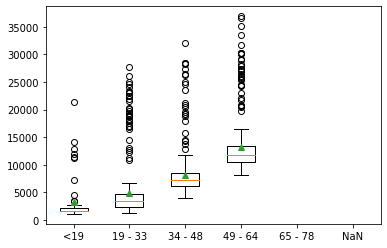

In [16]:
fliers, young_adults, adults, young_middle_aged, middle_aged, seniors  = compare_age_groups_of_non_smokers(ins);

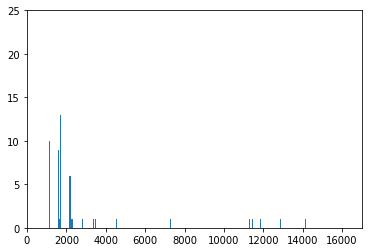

In [17]:
plt.hist(young_adults['charges'], bins=len(adults['charges']));
plt.xlim(0, 17000);
plt.ylim(0, 25);

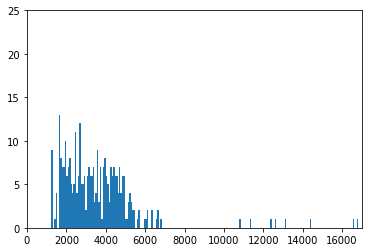

In [18]:
plt.hist(adults['charges'], bins=len(adults['charges']));
plt.xlim(0, 17000);
plt.ylim(0, 25);

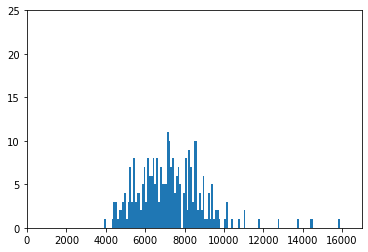

In [19]:
plt.hist(young_middle_aged['charges'], bins=len(young_middle_aged['charges']));
plt.xlim(0, 17000);
plt.ylim(0, 25);

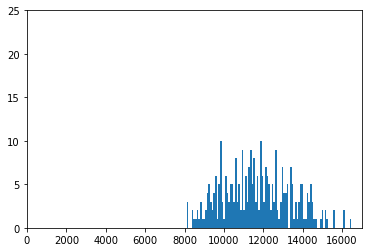

In [20]:
plt.hist(middle_aged['charges'], bins=len(middle_aged['charges']));
plt.xlim(0, 17000);
plt.ylim(0, 25);

## Comparing Number of Children

In [21]:
# This function shows no correlation between number of children and insurance cost
def compare_number_of_children(DataFrame):
    
    # indexing data
    smokers = list(DataFrame.loc[:, 'smoker'])
    children = list(DataFrame.loc[:, 'children'])
    charges = list(DataFrame.loc[:, 'charges'])
    
    # Zero Children:
    zero, zero_outliers, zero_dict, zero_fliers = list(), list(), dict(), dict()
    # One Child:
    one, one_outliers, one_dict, one_fliers = list(), list(), dict(), dict()   
    # Two Children: 
    two, two_outliers, two_dict, two_fliers = list(), list(), dict(), dict()    
    # Three Children:
    three, three_outliers, three_dict, three_fliers = list(), list(), dict(), dict() 
    # Four Children:
    four, four_outliers, four_dict, four_fliers = list(), list(), dict(), dict()
    # Five Children:
    five, five_outliers, five_dict, five_fliers = list(), list(), dict(), dict()
    
    
    # separate by number of children: iterate through smoker, children, and charges
    for i in range(len(ages)):
        if type(smokers[i]) == str:
            if children[i] == 0: # no children
                zero.append(i)
                # if charges[i] > 3597.5959999999995:
                #     ya_outliers.append(i)
                # else:
                #     ya.append(i)
            elif children[i] == 1: # one child
                one.append(i)
                #  if charges[i] > 17626.23951:
                #     one_outliers.append(i)
                # else:
                #     one.append(i)
            elif children[i] == 2: # two children
                two.append(i)
                # if charges[i] > 20177.671130000002:
                #     two_outliers.append(i)
                # else:
                #     two.append(i)
            elif children[i] == 3: # three children
                three.append(i)
                # if charges[i] > 20462.99766:
                #     three_outliers.append(i)
                # else:
                #     three.append(i)
            elif children[i] == 4: # four children
                four.append(i)
                # if charges[i] > 19496.71917:
                #     four_outliers.append(i)
                # else:
                #     four.append(i)
            else: # five children
                five.append(i)
                    
    # create DataFrames for separated data
    def DataFrameCreation(lists, dicts):
        
        for i in dicts:
            i['age'] = list()
            i['sex'] = list()
            i['bmi'] = list()
            i['children'] = list()
            i['smoker'] = list()
            i['region'] = list()
            i['charges'] = list()
        
        for i, j in enumerate(lists):
            for k in j:
                dicts[i]['age'].append(DataFrame.loc[k, 'age'])
                dicts[i]['sex'].append(DataFrame.loc[k, 'sex'])
                dicts[i]['bmi'].append(DataFrame.loc[k, 'bmi'])
                dicts[i]['children'].append(DataFrame.loc[k, 'children'])
                dicts[i]['smoker'].append(DataFrame.loc[k, 'smoker']) 
                dicts[i]['region'].append(DataFrame.loc[k, 'region']) 
                dicts[i]['charges'].append(DataFrame.loc[k, 'charges'])
    # lists, dicts, and function call to create DataFrames
    my_lists = [zero, zero_outliers, one, one_outliers, two, two_outliers, three, three_outliers, four, four_outliers, five, five_outliers]
    my_dicts = [zero_dict, zero_fliers, one_dict, one_fliers, two_dict, two_fliers, three_dict, three_fliers, four_dict, four_fliers, five_dict, five_fliers]          
    DataFrameCreation(my_lists, my_dicts)
    # combine all fliers into one dictionary
    def combine_fliers(dicts):
        return_dict = {}
        for i in dicts:
            for j, k in i.items():
                if j not in return_dict:
                    return_dict[j] = k
                else:
                    return_dict[j]+=k
        return return_dict
    fliers_dicts = [zero_fliers, one_fliers, two_fliers, three_fliers, four_fliers, five_fliers] # fliers from all age groups
    fliers = combine_fliers(fliers_dicts)    
    
    # boxplot to compare charges against varying age groups
    cats = (zero_dict['charges'], one_dict['charges'], two_dict['charges'], three_dict['charges'], four_dict['charges'], five_dict['charges'], fliers['charges'])
    labels = ('Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'NaN')
    x = plt.boxplot(cats, showmeans=True, labels=labels)
    means = [x['means'][0].get_data()[1][0], # no children mean
        x['means'][1].get_data()[1][0], # one child mean
        x['means'][2].get_data()[1][0], # two children mean
        x['means'][3].get_data()[1][0], # three children mean
        x['means'][4].get_data()[1][0], # four children mean
        x['means'][3].get_data()[1][0], # five children mean
        'NaN']
    
    # print data to find outliers
    def print_data(labels, cats, means):
        total_data_points = 0
        for i in range(len(cats)):
            total_data_points+=len(cats[i])
        print('Total Data points: {}'.format(total_data_points))
        for i, j in enumerate(zip(labels, cats)):
            print('Number of children {}:'.format(j[0]))
            print('\tsample size: {}'.format(len(j[1])))
            print('\tmedian: {}'.format(x['medians'][i].get_data()[1][0]))
            print('\tmean: {}'.format(means[i]))
            print('\tnumber of fliers: {}'.format(len(x['fliers'][i].get_data()[0])))
            print('\tupper-cap: {}'.format(list(x['caps'][(i*2)+1].get_data()[1])[0]))
    print_data(labels, cats, means)
    
    return fliers, zero_dict, one_dict, two_dict, three_dict, four_dict, five_dict  # returns a dictionary of fliers data

Total Data points: 1338
Number of children Zero:
	sample size: 574
	median: 9856.9519
	mean: 12365.97560163589
	number of fliers: 63
	upper-cap: 30259.995560000003
Number of children One:
	sample size: 324
	median: 8483.870149999999
	mean: 12731.171831635802
	number of fliers: 32
	upper-cap: 31620.001060000002
Number of children Two:
	sample size: 240
	median: 9264.97915
	mean: 15073.563733958332
	number of fliers: 19
	upper-cap: 40103.89
Number of children Three:
	sample size: 157
	median: 10600.5483
	mean: 15355.318366815283
	number of fliers: 16
	upper-cap: 37465.34375
Number of children Four:
	sample size: 25
	median: 11033.6617
	mean: 13850.6563112
	number of fliers: 2
	upper-cap: 24671.66334
Number of children Five:
	sample size: 18
	median: 8589.56505
	mean: 15355.318366815283
	number of fliers: 1
	upper-cap: 14478.33015
Number of children NaN:
	sample size: 0
	median: nan
	mean: NaN
	number of fliers: 0
	upper-cap: nan


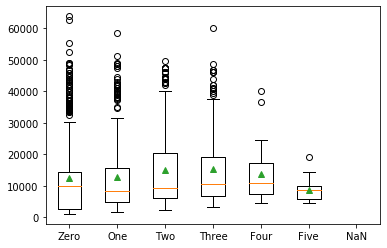

In [22]:
children_fliers, no_children, one_child, two_children, three_children, four_children, five_children = compare_number_of_children(ins)

## Comparing BMI Ranges

In [23]:
# This function shows a strong correlation between age and insurance cost
""" 
    * bmi ranges:
        1. underweight (<18.5)
        2. healthy (18.5-24.9)
        3. overweight (25.0-29.9)
        4. obese (30-39)
        5. extremely obese (>=40)
"""
def compare_bmi_groups_of_non_smokers(DataFrame):
    
    # indexing data
    smokers = list(DataFrame.loc[:, 'smoker'])
    bmis = list(DataFrame.loc[:, 'bmi'])
    charges = list(DataFrame.loc[:, 'charges']) # comparing outliers
    
    # underweight: bmi < 18.5
    uw, uw_outliers, uw_dict, uw_fliers = list(), list(), dict(), dict()
    # healthy: 18.5 <= bmi < 25
    h, h_outliers, h_dict, h_fliers = list(), list(), dict(), dict()   
    # overweight: 25 <= bmi < 30
    ow, ow_outliers, ow_dict, ow_fliers = list(), list(), dict(), dict() 
    # obese: 30 <= bmi < 40
    o, o_outliers, o_dict, o_fliers = list(), list(), dict(), dict() 
    # extremely obese: bmi >= 40
    eo, eo_outliers, eo_dict, eo_fliers = list(), list(), dict(), dict() 
    
    # separate ages and find outliers: iterate through smoker, age, and charges
    for i in range(len(bmis)):
        if smokers[i] == 'no':
            if bmis[i] < 18.5: # underweight
                uw.append(i)
                #if charges[i] > 3597.5959999999995:
                #    uw_outliers.append(i)
                #else:
                #    uw.append(i)
            elif bmis[i] < 25: # healthy
                h.append(i)
                #if charges[i] > 7986.47525:
                #    h_outliers.append(i)
                #else:
                #    h.append(i)
            elif bmis[i] < 30: # overweight
                ow.append(i)
                #if charges[i] > 15828.821730000001:
                #    ow_outliers.append(i)
                #else:
                #    ow.append(i)
            elif bmis[i] < 40: # obese
                o.append(i)
                #if charges[i] > 15828.821730000001:
                #    o_outliers.append(i)
                #else:
                #    o.append(i)
            elif bmis[i] >= 40: # extremely obese
                eo.append(i)
                #if charges[i] > 16069.08475:
                #    eo_outliers.append(i)
                #else:
                #    eo.append(i)
                    
    # create DataFrames for separated data
    def DataFrameCreation(lists, dicts):
        
        for i in dicts:
            i['age'] = list()
            i['sex'] = list()
            i['bmi'] = list()
            i['children'] = list()
            i['smoker'] = list()
            i['region'] = list()
            i['charges'] = list()
        
        for i, j in enumerate(lists):
            for k in j:
                dicts[i]['age'].append(DataFrame.loc[k, 'age'])
                dicts[i]['sex'].append(DataFrame.loc[k, 'sex'])
                dicts[i]['bmi'].append(DataFrame.loc[k, 'bmi'])
                dicts[i]['children'].append(DataFrame.loc[k, 'children'])
                dicts[i]['smoker'].append(DataFrame.loc[k, 'smoker']) 
                dicts[i]['region'].append(DataFrame.loc[k, 'region']) 
                dicts[i]['charges'].append(DataFrame.loc[k, 'charges'])
    # lists, dicts, and function call to create DataFrames
    my_lists = [uw, uw_outliers, h, h_outliers, ow, ow_outliers, o, o_outliers, eo, eo_outliers]
    my_dicts = [uw_dict, uw_fliers, h_dict, h_fliers, ow_dict, ow_fliers, o_dict, o_fliers, eo_dict, eo_fliers]          
    DataFrameCreation(my_lists, my_dicts)
    # combine all fliers into one dictionary
    def combine_fliers(dicts):
        return_dict = {}
        for i in dicts:
            for j, k in i.items():
                if j not in return_dict:
                    return_dict[j] = k
                else:
                    return_dict[j]+=k
        return return_dict
    fliers_dicts = [uw_fliers, h_fliers, ow_fliers, o_fliers, eo_fliers] # fliers from all age groups
    fliers = combine_fliers(fliers_dicts)    
    
    # boxplot to compare charges against varying age groups
    cats = (uw_dict['charges'], h_dict['charges'], ow_dict['charges'], o_dict['charges'], eo_dict['charges'], fliers['charges'])
    labels = ('Underweight', 'Healthy', 'Overweight', 'Obese', 'Extremely Obese', 'NaN')
    x = plt.boxplot(cats, showmeans=True, labels=labels)
    means = [x['means'][0].get_data()[1][0],    # underweight mean
                x['means'][1].get_data()[1][0], # healthy mean
                x['means'][2].get_data()[1][0], # overweight mean
                x['means'][3].get_data()[1][0], # obese mean
                x['means'][3].get_data()[1][0], # extremely obese mean
                'NaN']
    
    # print data to find outliers
    def print_data(labels, cats, means):
        total_data_points = 0
        for i in range(len(cats)):
            total_data_points+=len(cats[i])
        print('Total Data points: {}'.format(total_data_points))
        for i, j in enumerate(zip(labels, cats)):
            print('{}:'.format(j[0]))
            print('\tsample size: {}'.format(len(j[1])))
            print('\tmedian: {}'.format(x['medians'][i].get_data()[1][0]))
            print('\tmean: {}'.format(means[i]))
            print('\tnumber of fliers: {}'.format(len(x['fliers'][i].get_data()[0])))
            print('\tupper-cap: {}'.format(list(x['caps'][(i*2)+1].get_data()[1])[0]))
    print_data(labels, cats, means)
    
    return fliers, uw_dict, h_dict, ow_dict, o_dict, eo_dict  # returns a dictionary of fliers data

Total Data points: 1064
Underweight:
	sample size: 15
	median: 3732.6251
	mean: 5532.992453333335
	number of fliers: 0
	upper-cap: 13204.28565
Healthy:
	sample size: 175
	median: 6593.5083
	mean: 7685.656014000002
	number of fliers: 11
	upper-cap: 17626.23951
Overweight:
	sample size: 312
	median: 7063.9157
	mean: 8257.961954996794
	number of fliers: 14
	upper-cap: 21232.182259999998
Obese:
	sample size: 492
	median: 8116.474425
	mean: 8937.024683008129
	number of fliers: 21
	upper-cap: 23082.95533
Extremely Obese:
	sample size: 70
	median: 7727.467125
	mean: 8937.024683008129
	number of fliers: 2
	upper-cap: 20709.02034
NaN:
	sample size: 0
	median: nan
	mean: NaN
	number of fliers: 0
	upper-cap: nan


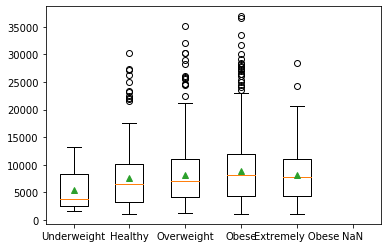

In [24]:
bmi_fliers, underweight, healthy, overweight, obese, extremely_obese = compare_bmi_groups_of_non_smokers(ins);

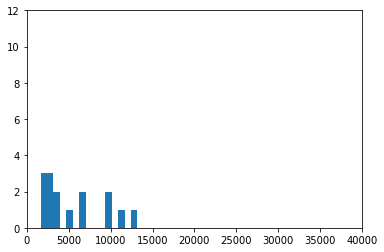

In [25]:
plt.hist(underweight['charges'], bins=len(underweight['charges']));
plt.xlim(0, 40000);
plt.ylim(0, 12);

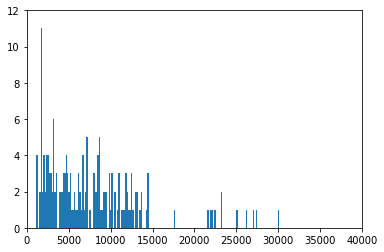

In [26]:
plt.hist(healthy['charges'], bins=len(healthy['charges']));
plt.xlim(0, 40000);
plt.ylim(0, 12);

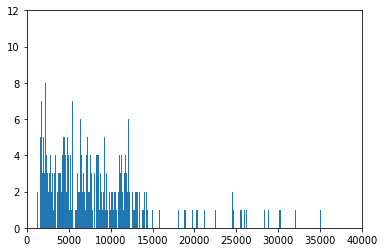

In [27]:
plt.hist(overweight['charges'], bins=len(overweight['charges']));
plt.xlim(0, 40000);
plt.ylim(0, 12);

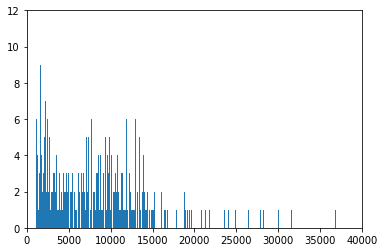

In [28]:
plt.hist(obese['charges'], bins=len(obese['charges']));
plt.xlim(0, 40000);
plt.ylim(0, 12);

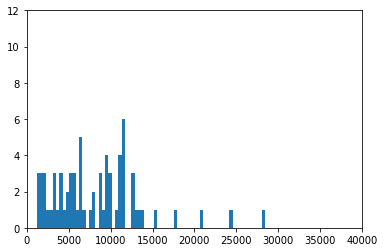

In [29]:
plt.hist(extremely_obese['charges'], bins=len(extremely_obese['charges']));
plt.xlim(0, 40000);
plt.ylim(0, 12);

0.2814645308924485


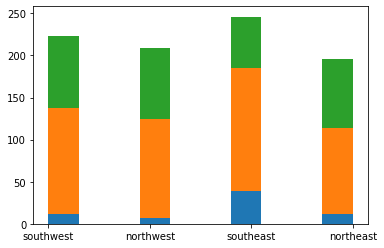

In [30]:
x = extremely_obese['region']
y = obese['region']
z = overweight['region']
yse = y.count('southeast')
xse = x.count('southeast')
zse = z.count('southeast')
print((xse + yse + zse)/(len(x) + len(y) + len(z)))
plt.hist((x, y, z), stacked=True);